In [1]:
"""
    openCV에서 사용할 수 있는 crop 함수
    4분할된 이미지 리스트 반환
"""

def image_crop(file, image_width, image_height, cropped_width, cropped_height):
    cropped_images = []
    x = 0
    
    while x < image_width:
        y = 0
        while y < image_height:
            cropped_image = file[x : x + cropped_width, y : y + cropped_height]
            cropped_images.append(cropped_image)
            y += cropped_height
        x += cropped_width
    
    return cropped_images

In [2]:
def data_generator(file, image_width, image_height):
    img_bgr = cv2.imread(file , cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img_rgb, (image_width, image_height))

    return img

In [10]:
import random

"""이미지 증강 함수"""

def image_augmentation(files, index, limit, image_width, image_height):
    random_num = []
    X_array =[]
    y_array = []
    images = []
    data = []
    
    while len(images) <= (limit - 4):
#        print('********************len(images)=', len(images))
        try:
            while (len(random_num) < len(files)):
                i = random.randrange(len(files))
                
#                 print('i=', i)
#                 print('random_num=')
#                 print(random_num)
#                 print('len(random_num)=', len(random_num))
                
                if (i not in random_num) :
                        
                    random_num.append(i)
                    
                    file = files[i]
            
                    img = data_generator(file, image_width, image_height)

                    images.append(img)
                    images.append(cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE))  # 시계 방향으로 90도 회전
                    images.append(cv2.rotate(img, cv2.ROTATE_180))  # 180도 회전
                    images.append(cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)) # 반시계 방향 90도 회전
                    
                    
                else : # i in random_num
                    continue
                    

        
        except Exception as e:
            print(e)
            print('aug: '+ str(i)+" 번째에서 에러 ")
            
    
    for image in images:
        cropped_images = image_crop(image, image_width, image_height, image_width // 2, image_height // 2)
        for cropped_image in cropped_images:
            data = np.asarray(cropped_image)
            X_array.append(data)
            y_array.append(index)
    

    
    return X_array, y_array

In [4]:
import random

"""이미지 뽑기 함수"""

def image_selector(files, index, limit, image_width, image_height):
    random_files = []
    random_num = []
    X_array = []
    y_array = []
    data = []
        
    while len(random_num) < limit:
        rand = random.randrange(len(files))
        if rand not in random_num or len(random_num) == len(files):
            random_num.append(rand)
            random_files.append(files[rand])
            
    
    
    for i, f in enumerate(random_files):
        try:
            img = data_generator(f, image_width, image_height)
            cropped_images = image_crop(img, image_width, image_height, image_width // 2, image_height // 2)
            
            for image in cropped_images:
                data = np.asarray(image)
                X_array.append(data)
                y_array.append(index)

        except Exception as e:
            print(e)
            print('select'+str(i)+" 번째에서 에러 ")

            
    return X_array, y_array

In [5]:
import os, glob

"""하위 폴더 및 파일 탐색"""
    
def is_dir_file(dir_path, dir_list, img_limit, img_limit_list):
    
    folders = os.listdir(dir_path)
    
    for folder in folders:
        path_detail = os.path.join(dir_path, folder)
        
        if os.path.isdir(path_detail):
            new_img_limit = int(img_limit / len(folders))   
            is_dir_file(path_detail, dir_list, new_img_limit, img_limit_list)
        else:    
            print(dir_path + ' img limit : ' + str(img_limit))
            dir_list.append(dir_path)
            img_limit_list.append(img_limit)
            return

In [12]:
#본 코드 시작

import cv2
import os, glob
from os import remove
import numpy as np

img_dir = './binary_cnn_majority/train'
categories = ['ad', 'non_ad']

size = 120

sum = 0
ad_index = 0
non_ad_index = 1
image_width, image_height = size, size


file_list_index = []
img_limit_list = []
X = []
y = []

In [13]:
np_classes = len(categories)    
print(categories)

for i, category in enumerate(categories):
    file_directory = []
    img_dir_detail = os.path.join(img_dir, category)
    
    if i == ad_index:
        img_limit = 1800 # 데이터 수에 따라 값 변경
    elif i == non_ad_index:
        img_limit = 1800 # 458*4 == 1832
        
    is_dir_file(img_dir_detail, file_directory, img_limit, img_limit_list)
    
    for directory in file_directory:
        file_list_index.append([i, directory])

print(file_list_index)

['ad', 'non_ad']
./binary_cnn_majority/train\ad\bill img limit : 163
./binary_cnn_majority/train\ad\coin img limit : 163
./binary_cnn_majority/train\ad\general_product img limit : 163
./binary_cnn_majority/train\ad\graph img limit : 163
./binary_cnn_majority/train\ad\human img limit : 163
./binary_cnn_majority/train\ad\lotto_N img limit : 163
./binary_cnn_majority/train\ad\lotto_P img limit : 163
./binary_cnn_majority/train\ad\microbe img limit : 163
./binary_cnn_majority/train\ad\part_of_human img limit : 163
./binary_cnn_majority/train\ad\photoshop img limit : 163
./binary_cnn_majority/train\ad\picture img limit : 163
./binary_cnn_majority/train\non_ad img limit : 1800
[[0, './binary_cnn_majority/train\\ad\\bill'], [0, './binary_cnn_majority/train\\ad\\coin'], [0, './binary_cnn_majority/train\\ad\\general_product'], [0, './binary_cnn_majority/train\\ad\\graph'], [0, './binary_cnn_majority/train\\ad\\human'], [0, './binary_cnn_majority/train\\ad\\lotto_N'], [0, './binary_cnn_majority/

In [14]:
for lst in file_list_index:
    print(lst[0])

count = 0

0
0
0
0
0
0
0
0
0
0
0
1


In [15]:
print('img_limit_list******')
print(img_limit_list)

for index, directory in file_list_index:
    print(directory)
    files = glob.glob(directory + "/*.jpg")
    print(directory + 'glob 완료')
    len_file = len(files) # 해당 디렉토리 내 파일 개수
    print('len_file=')
    print(len_file)

    img_limit = img_limit_list[count] # 1832/11/4 == 41 
    print('count=', count)
    print('img_limit =')
    print(img_limit)

    if len_file <img_limit:
        X_temp, y_temp = image_augmentation(files, index, img_limit, image_width, image_height)
        print(directory + 'image aug 완료')
    else:
        X_temp, y_temp = image_selector(files, index, img_limit, image_width, image_height)
        print(directory + 'image select 완료')


    X = X + X_temp
    y = y + y_temp

    len_file = len(X_temp)
    print(directory + '파일 길이 : ' + str(len_file))
    sum += len_file
    count += 1
        
    
print('총 파일 길이 : ' + str(sum))

X = np.array(X)
Y = np.array(y)

print(len(X), len(Y))

"""이미지 크기 인자를 조절하면서 적용"""

img_limit_list******
[163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 1800]
./binary_cnn_majority/train\ad\bill
./binary_cnn_majority/train\ad\billglob 완료
len_file=
103
count= 0
img_limit =
163
./binary_cnn_majority/train\ad\billimage aug 완료
./binary_cnn_majority/train\ad\bill파일 길이 : 1648
./binary_cnn_majority/train\ad\coin
./binary_cnn_majority/train\ad\coinglob 완료
len_file=
67
count= 1
img_limit =
163
./binary_cnn_majority/train\ad\coinimage aug 완료
./binary_cnn_majority/train\ad\coin파일 길이 : 1072
./binary_cnn_majority/train\ad\general_product
./binary_cnn_majority/train\ad\general_productglob 완료
len_file=
207
count= 2
img_limit =
163
./binary_cnn_majority/train\ad\general_productimage select 완료
./binary_cnn_majority/train\ad\general_product파일 길이 : 652
./binary_cnn_majority/train\ad\graph
./binary_cnn_majority/train\ad\graphglob 완료
len_file=
78
count= 3
img_limit =
163
./binary_cnn_majority/train\ad\graphimage aug 완료
./binary_cnn_majority/train\ad\graph파일 길이 : 1248
./binary_cnn_

'이미지 크기 인자를 조절하면서 적용'

In [11]:
'''from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

print(X_train.shape)
# print(X_train.shape[0])
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(np.bincount(y_train))
print(np.bincount(y_test))'''

(11373, 90, 90, 3)
(11373,)
(3791, 90, 90, 3)
(3791,)
[6547 4826]
[2217 1574]


In [16]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [17]:
X = X.astype('float32') / 255

모델 아키텍처 설정

In [19]:
# import os
# import keras.backend.tensorflow_backend as K
from tensorflow.keras import optimizers

lrate=0.009
op = optimizers.RMSprop(learning_rate=lrate)

dr = 0.15

# with K.tf_ops.device('/device:GPU:0'):
model = Sequential()

model.add(Conv2D(32, (3,3), padding="same", input_shape=X.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(dr))

model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(dr))


model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dr))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
#model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dr))
model.add(BatchNormalization())

#model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
#model.add(Conv2D(128, (3,3), padding="same", activation="relu"))
# model.add(Dropout(0.15))
#model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(dr))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer=op, metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 60, 60, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)       

모델 훈련

In [21]:
df = pd.DataFrame(index = ['epoch'], columns = ['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
batch = 32
epoch = 40

history = model.fit(X, Y, batch_size=batch, epochs=epoch, validation_split=0.15, verbose=1)


Epoch 1/40
451/451 [==============================] - 49s 107ms/step - loss: 0.7140 - accuracy: 0.6532 - val_loss: 1.1247 - val_accuracy: 0.0000e+00
Epoch 2/40
451/451 [==============================] - 54s 120ms/step - loss: 0.5984 - accuracy: 0.6781 - val_loss: 1.2484 - val_accuracy: 0.1579
Epoch 3/40
451/451 [==============================] - 53s 118ms/step - loss: 0.5428 - accuracy: 0.7412 - val_loss: 0.8110 - val_accuracy: 0.6496
Epoch 4/40
451/451 [==============================] - 54s 120ms/step - loss: 0.5051 - accuracy: 0.7724 - val_loss: 1.5225 - val_accuracy: 0.0797
Epoch 5/40
451/451 [==============================] - 55s 121ms/step - loss: 0.4758 - accuracy: 0.7870 - val_loss: 0.6410 - val_accuracy: 0.6025
Epoch 6/40
451/451 [==============================] - 56s 123ms/step - loss: 0.4595 - accuracy: 0.8016 - val_loss: 1.4314 - val_accuracy: 0.2027
Epoch 7/40
451/451 [==============================] - 58s 129ms/step - loss: 0.4451 - accuracy: 0.8063 - val_loss: 1.6828 - va

In [23]:
model.save('./binary_cnn_majority/model/size/binary_model_saved_i' + str(size) + '.h5')

In [24]:
type(history)

tensorflow.python.keras.callbacks.History

In [29]:
for i in range(40):
    df.loc[(i+1), 'loss'] = history.history['loss'][i]
    df.loc[(i+1), 'accuracy'] = history.history['accuracy'][i]
    df.loc[(i+1), 'val_loss'] = history.history['val_loss'][i]
    df.loc[(i+1), 'val_accuracy'] = history.history['val_accuracy'][i]

In [30]:
df

,loss,accuracy,val_loss,val_accuracy
epoch,NaN,NaN,NaN,NaN
1,0.713996,0.653196,1.12465,0
2,0.598429,0.678081,1.24841,0.157895
3,0.542814,0.741231,0.811027,0.649647
4,0.505119,0.772425,1.52245,0.0797329
5,0.475826,0.786982,0.640977,0.602514
6,0.459505,0.801608,1.43139,0.202671
7,0.445077,0.806253,1.68277,0.31304
8,0.434554,0.811174,1.88781,0.559702
9,0.425816,0.819354,2.94381,0.12883


In [32]:
df.dropna(axis=0, inplace=True)
df

,loss,accuracy,val_loss,val_accuracy
1,0.713996,0.653196,1.12465,0
2,0.598429,0.678081,1.24841,0.157895
3,0.542814,0.741231,0.811027,0.649647
4,0.505119,0.772425,1.52245,0.0797329
5,0.475826,0.786982,0.640977,0.602514
6,0.459505,0.801608,1.43139,0.202671
7,0.445077,0.806253,1.68277,0.31304
8,0.434554,0.811174,1.88781,0.559702
9,0.425816,0.819354,2.94381,0.12883
10,0.411507,0.829336,2.77293,0.208955


In [33]:
df.to_csv('./binary_cnn_majority/csv/train_i'+str(size)+'.csv', sep=',', na_rep='NaN')

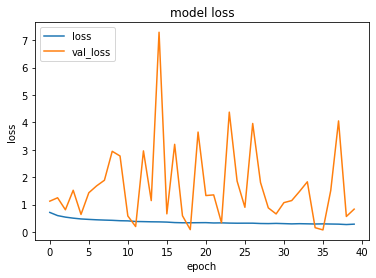

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

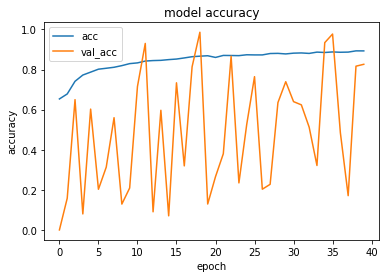

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'] )
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()